In [2]:
from tensorflow import keras
from tensorflow.keras import layers

from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np

import tensorflow as tf

import random

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
# Normalize the data
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

# Category to one hot encoding
categories = y_train.max() - y_train.min() + 1

y_train = np.eye(categories)[y_train]
y_test = np.eye(categories)[y_test]

In [5]:
# Create a list of human redable categories
human_category = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandals", "Shirt", "Sneaker", "Bag", "Ankle boots"]

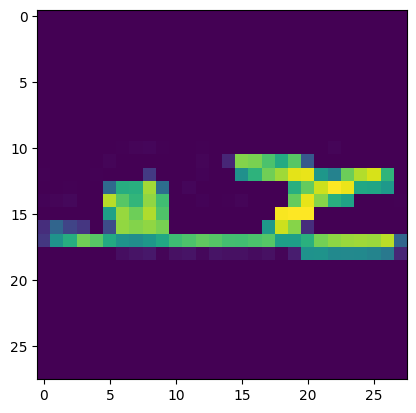

categoty: Sandals


In [6]:
# Display a random element of the dataset
element = random.randint(0, len(x_train) - 1)

plt.imshow(x_train[element])
plt.show()

# Print the label
print(f"categoty: {human_category[y_train[element].argmax()]}")


In [7]:
# Define the model
model = keras.Sequential()

# Input
model.add(layers.Input((28, 28, 1)))

# Convolutional
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.2))

model.add(layers.Flatten())

# Dense
model.add(layers.Dense(64, activation="relu"))

# Output
model.add(layers.Dense(categories, activation="softmax"))


# Compile the model
learning_rate = 0.01

model.compile(optimizer=keras.optimizers.Adam(learning_rate),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=["accuracy"])


2022-09-10 14:30:27.094420: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-10 14:30:27.106039: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-10 14:30:27.106378: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-10 14:30:27.106890: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [8]:
# Train and evaluate the model 
batch_size = 32
epochs = 10

model.fit(x=x_train.reshape(-1, 28, 28, 1), y=y_train, batch_size=batch_size, epochs=epochs)


# Evaluate
print("\nevaluation: \n")
model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)

2022-09-10 14:30:27.722506: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10


2022-09-10 14:30:27.851674: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-09-10 14:30:28.655574: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-09-10 14:30:29.074965: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-10 14:30:29.075328: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-10 14:30:29.075350: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-09-10 14:30:29.075751: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-10 14:30:29.075784: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Mod

1875/1875 [==============================] - 5s 2ms/step - loss: 0.4131 - accuracy: 0.8521
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3305 - accuracy: 0.8789
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3037 - accuracy: 0.8882
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2906 - accuracy: 0.8922
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2801 - accuracy: 0.8949
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2707 - accuracy: 0.8994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2672 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2590 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2538 - accuracy: 0.9061
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2506 - accurac

[0.3955342471599579, 0.8787999749183655]

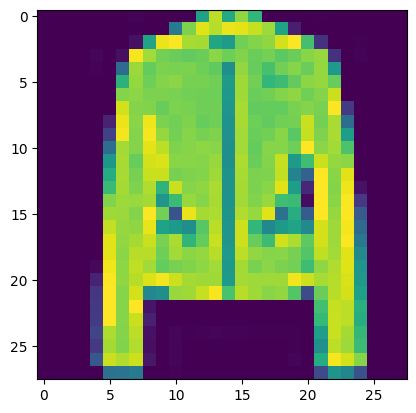

1/1 [==============================] - 0s 16ms/step
predicted: Coat
real: Coat


In [12]:
# Make prediction on the test dataset
# Select a random element from the test dataset
element = random.randint(0, len(x_test) - 1)

plt.imshow(x_test[element])
plt.show()


# Make prediction
pred_category = model.predict(x_test[element].reshape(1, 28, 28, 1))
pred_category = pred_category.argmax()
# Get the real value
real_categoty = y_test[element].argmax()


print(f"predicted: {human_category[pred_category]}\nreal: {human_category[real_categoty]}")